In [21]:
import numpy as np
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os


## Data Loading

In [7]:
base_dir = os.path.join('/Users/ofrihefetz/PycharmProjects/lab2_hw2/data')
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

In [4]:
def load_datasets(train_dir, val_dir):
    """Loads and transforms the datasets."""
    # Resize the samples and transform them into tensors
    data_transforms = transforms.Compose([transforms.Resize([64, 64]), transforms.ToTensor()])

    # Create a pytorch dataset from a directory of images
    train_dataset = datasets.ImageFolder(train_dir, data_transforms)
    val_dataset = datasets.ImageFolder(val_dir, data_transforms)

    return train_dataset, val_dataset

In [10]:
train_dataset, val_dataset = load_datasets(train_dir, val_dir)

## General information

In [24]:
print(f'The number of train samples ={len(train_dataset)} and of val ={len(val_dataset)}')

The number of train samples =2067 and of val =10


In [56]:
train_dataset.classes

['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']

#### class distributions

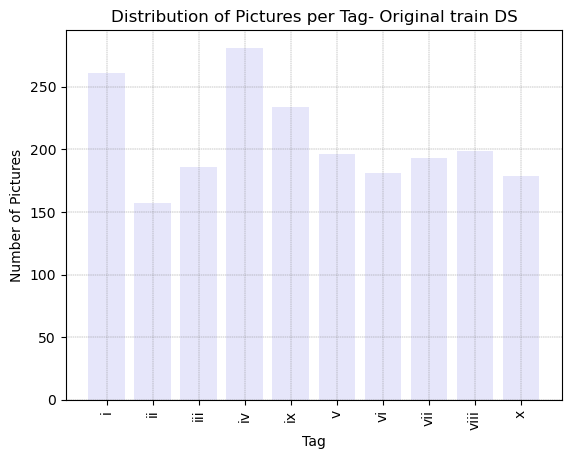

In [46]:
# Get the list of classes/tags in the dataset
class_names = train_dataset.classes
# Count the number of pictures under each tag
tag_counts = [0] * len(class_names)
for _, label in train_dataset:
    tag_counts[label] += 1
# Set the color for the bars
bar_color = '#E6E6FA'
# Plot the histogram
plt.bar(class_names, tag_counts, color=bar_color)
plt.xlabel('Tag')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.ylabel('Number of Pictures')
plt.title('Distribution of Pictures per Tag- Original train DS')
plt.xticks(rotation=90)
plt.show()

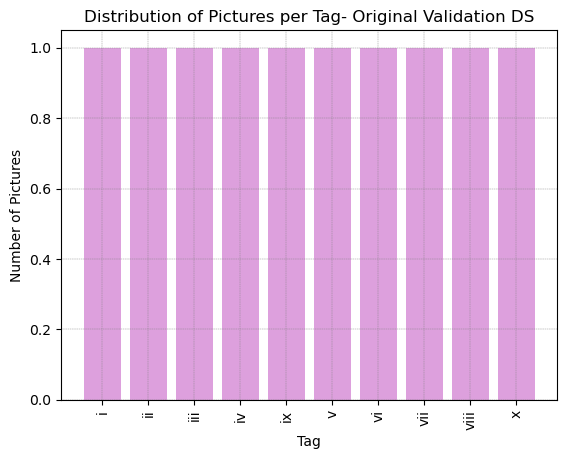

In [53]:
val_counts = [0] * len(class_names)
for _, label in val_dataset:
    val_counts[label] += 1
# Set the color for the bars
bar_color = 'plum'
# Plot the histogram
plt.bar(class_names, val_counts, color=bar_color)
plt.xlabel('Tag')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.ylabel('Number of Pictures')
plt.title('Distribution of Pictures per Tag- Original Validation DS')
plt.xticks(rotation=90)
plt.show()

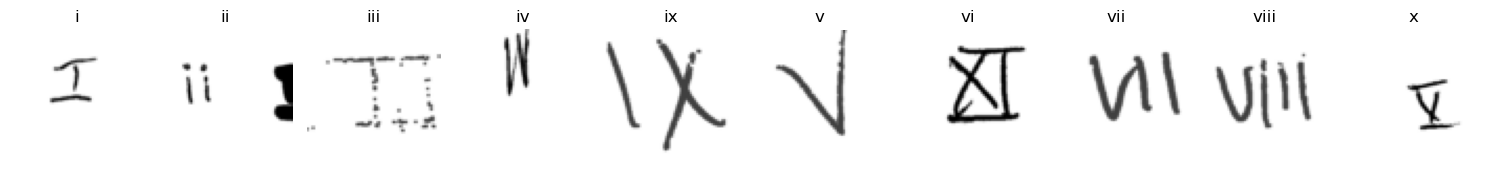

In [55]:
# Get the list of classes/tags in the dataset
class_names = train_dataset.classes
example_images = {}
# Iterate over the dataset and select one image from each class
for class_index, class_name in enumerate(class_names):
    # Find the first image index in the class
    image_indices = np.where(np.array(train_dataset.targets) == class_index)[0]
    example_index = image_indices[0]
    # Retrieve the image and its label
    example_image, _ = train_dataset[example_index]
    # Store the example image in the dictionary
    example_images[class_name] = example_image

# Plot the example images next to each other
fig, axs = plt.subplots(1, len(class_names), figsize=(15, 3))
for i, class_name in enumerate(class_names):
    example_image = example_images[class_name]
    axs[i].imshow(example_image.permute(1, 2, 0))
    axs[i].set_title(class_name)
    axs[i].axis('off')
plt.tight_layout()
plt.show()

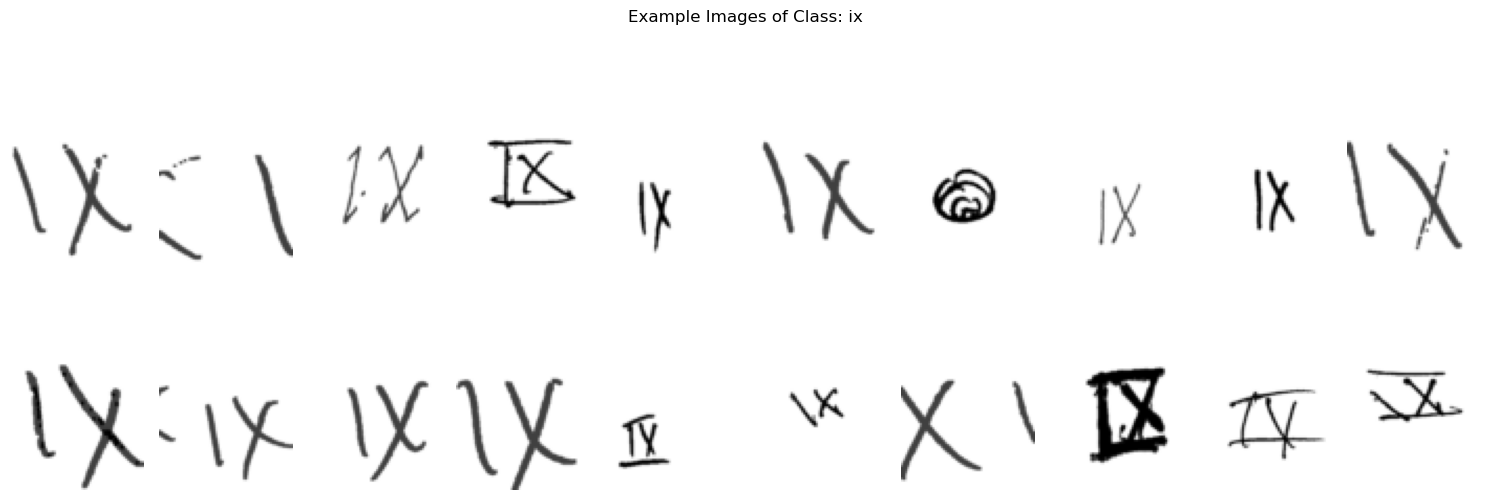

In [60]:
# Specify the class for which you want to print examples
desired_class = 'ix'  # Replace 'class_name' with the desired class name

# Find the class index in the dataset
class_index = class_names.index(desired_class)

# Create a list to store example images of the desired class
example_images = []

# Iterate over the dataset and select example images of the desired class
for i, (image, label) in enumerate(train_dataset):
    if label == class_index:
        example_images.append(image)

        if len(example_images) == 20:
            break

# Plot the example images next to each other
fig, axs = plt.subplots(2, 10, figsize=(15, 6))
fig.suptitle('Example Images of Class: ' + desired_class)

for i, image in enumerate(example_images):
    ax = axs[i // 10, i % 10]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis('off')

plt.tight_layout()
plt.show()
